# **1. Perkenalan Dataset**


## 📊 **Informasi Dataset Heart Disease**

### **Sumber Dataset**
Dataset ini merupakan **Heart Disease Prediction Dataset** yang berisi informasi klinis dan gaya hidup untuk menilai risiko penyakit jantung pada individu. Setiap baris merepresentasikan satu pasien, dan setiap kolom menangkap atribut medis yang dapat mempengaruhi kesehatan kardiovaskular.

- **Sumber**: Kaggle - NeuroCipher
- **Link Dataset**: [Heart Disease Dataset](https://www.kaggle.com/datasets/neurocipher/heartdisease?resource=download)
- **Nama File**: `Heart_Disease_Prediction.csv` (di workspace: `Heart_Disease_Raw.csv`)

### **Karakteristik Dataset**
- **Jumlah Sampel**: 270 pasien
- **Ukuran File**: 11.93 kB
- **Target Variable**: `Heart Disease` (1 = Ada penyakit jantung, 0 = Tidak ada)
- **Tipe Dataset**: Supervised Learning - Binary Classification
- **Usability Score**: 10.0/10.0

### **Deskripsi Fitur**
| No | Fitur | Deskripsi | Tipe Data |
|----|-------|-----------|-----------|
| 1 | **Age** 👤 | Usia pasien (dalam tahun) | Numerik |
| 2 | **Sex** 🚻 | Jenis kelamin (1 = Pria, 0 = Wanita) | Kategorikal |
| 3 | **Chest Pain Type** ❤️‍🩹 | Tipe nyeri dada yang dialami pasien | Kategorikal |
| 4 | **Resting BP** 🩸 | Tekanan darah istirahat (Resting Blood Pressure) | Numerik |
| 5 | **Cholesterol** 🧪 | Kadar kolesterol serum (mg/dl) | Numerik |
| 6 | **Fasting BS** 🍬 | Gula darah puasa (1 = Tinggi, 0 = Normal) | Kategorikal |
| 7 | **Resting ECG** 🧷 | Hasil elektrokardiogram (ECG) saat istirahat | Kategorikal |
| 8 | **Max HR** 🏃‍♂️ | Detak jantung maksimum yang dicapai | Numerik |
| 9 | **Exercise Angina** 😣 | Angina yang diinduksi oleh olahraga | Kategorikal |
| 10 | **Oldpeak** 📉 | Depresi ST dari olahraga (ST depression) | Numerik |
| 11 | **ST_Slope** 📐 | Kemiringan segmen ST (Slope of ST segment) | Kategorikal |

### **Target Variable** 🎯
- **Heart Disease**: 
  - `1` 🟥 → **Presence** (Ada penyakit jantung)
  - `0` 🟩 → **Absence** (Tidak ada penyakit jantung)
  
  *(Di dataset raw, nilai ini bertipe categorical: "Presence"/"Absence" yang akan di-encode menjadi 1/0)*

### **Kegunaan Dataset** 🔍
Dataset ini sangat cocok untuk:
- 🤖 **Binary classification models** - Klasifikasi penyakit jantung
- 📊 **Exploratory Data Analysis (EDA)** - Analisis pola dan korelasi
- 🩺 **Medical risk assessment** - Penilaian risiko medis
- 🧠 **Predictive analytics** - Prediksi penyakit jantung
- ⚙️ **Feature engineering & model optimization** - Optimasi model ML
- 🚑 **Clinical decision support** - Dukungan keputusan klinis
- 🎓 **Machine Learning practice** - Pembelajaran ML (beginner to intermediate)

### **Tujuan Analisis**
Membangun model machine learning untuk **memprediksi keberadaan penyakit jantung** berdasarkan data klinis dan demografis pasien, yang dapat membantu tenaga medis dalam **early detection** (deteksi dini) dan diagnosis awal penyakit jantung.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:

dataset_dir = os.path.join('..')

# Cek isi folder dataset
data_files = os.listdir(dataset_dir)
print("Files in dataset:", data_files)

# Load dataset
file_path = os.path.join(dataset_dir, 'Heart_Disease_Raw.csv')
df = pd.read_csv(file_path)

print("\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Files in dataset: ['.git', '.github', 'Heart_Disease_Raw.csv', 'preprocessing', 'README.md', 'screeanshot_Github Action.png']

Dataset loaded successfully!
Shape: (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtype

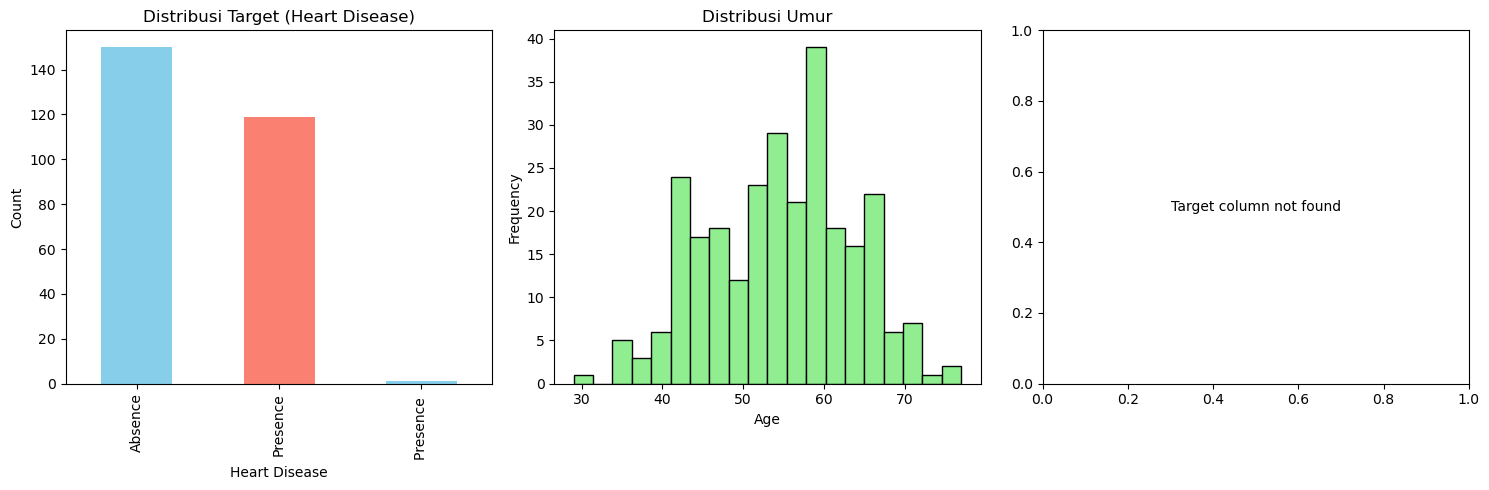


=== Korelasi dengan Target ===
Target column belum di-encode atau tidak ditemukan dalam kolom numerik


In [3]:
# Informasi dasar dataset
print("=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe())

print("\n=== Cek Missing Values ===")
print(df.isnull().sum())

print("\n=== Cek Duplikasi ===")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Memastikan hanya kolom numerik untuk visualisasi
numeric_df = df.select_dtypes(include=[np.number])

# Visualisasi distribusi target
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
if 'Heart Disease' in df.columns:
    df['Heart Disease'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Distribusi Target (Heart Disease)')
    plt.xlabel('Heart Disease')
    plt.ylabel('Count')

# Distribusi umur
plt.subplot(1, 3, 2)
if 'Age' in df.columns:
    plt.hist(df['Age'], bins=20, color='lightgreen', edgecolor='black')
    plt.title('Distribusi Umur')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

# Correlation heatmap (top features)
plt.subplot(1, 3, 3)
if len(numeric_df.columns) > 0:
    correlation = numeric_df.corr()
    # Cek kolom Heart Disease setelah encoding
    target_col = None
    if 'Heart Disease' in correlation.columns:
        target_col = 'Heart Disease'
    
    if target_col:
        top_corr = correlation[[target_col]].sort_values(by=target_col, ascending=False).head(10)
        sns.heatmap(top_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
        plt.title('Top 10 Correlation with Target')
    else:
        plt.text(0.5, 0.5, 'Target column not found', ha='center', va='center')

plt.tight_layout()
plt.show()

# Menampilkan korelasi dengan target
print("\n=== Korelasi dengan Target ===")
if 'Heart Disease' in df.columns and df['Heart Disease'].dtype in [np.int64, np.float64]:
    print(numeric_df.corr()['Heart Disease'].sort_values(ascending=False))
else:
    print("Target column belum di-encode atau tidak ditemukan dalam kolom numerik")

# **5. Data Preprocessing**

## 🔧 **Data Preprocessing**

Preprocessing adalah tahap penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Berikut adalah tahapan preprocessing yang akan dilakukan:

### **Tahapan Preprocessing:**

1. **Handling Missing Values** - Menghapus atau mengisi data yang kosong
2. **Handling Duplicates** - Menghapus data duplikat
3. **Target Encoding** - Mengkonversi target dari kategorikal (Presence/Absence) ke numerik (1/0)
4. **Outlier Detection** - Mendeteksi outlier menggunakan metode IQR (Interquartile Range)
5. **Feature Standardization** - Menstandarisasi fitur menggunakan StandardScaler (mean=0, std=1)
6. **Train-Test Split** - Membagi data menjadi training (80%) dan testing (20%) dengan stratified sampling

### **Output Preprocessing:**
Setelah preprocessing selesai, data akan tersimpan di:
- **Lokasi**: `preprocessing/Heart_Disease_preprocessing/Heart_Disease_preprocessing.csv`
- **Format**: CSV dengan kolom tambahan `split` (train/test)
- **Shape**: 
  - Training: 216 sampel × 13 fitur
  - Testing: 54 sampel × 13 fitur

---

### **Kode Preprocessing:**

In [5]:
# ============================================
# TAHAP 1: HANDLING MISSING VALUES
# ============================================
print("=== Handling Missing Values ===")
print(f"Missing values sebelum: {df.isnull().sum().sum()}")
df = df.dropna()  # Menghapus baris dengan missing values
print(f"Missing values setelah: {df.isnull().sum().sum()}")

# ============================================
# TAHAP 2: HANDLING DUPLICATES
# ============================================
print(f"\n=== Handling Duplicates ===")
print(f"Duplikasi sebelum: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplikasi setelah: {df.duplicated().sum()}")
print(f"Shape setelah cleaning: {df.shape}")

# ============================================
# TAHAP 3: TARGET ENCODING
# ============================================
print("\n=== Encoding Target Variable ===")
print(f"Nilai unik Heart Disease sebelum encoding: {df['Heart Disease'].unique()}")

# Mapping Heart Disease ke nilai numerik
# Presence (ada penyakit jantung) = 1
# Absence (tidak ada penyakit jantung) = 0
if df['Heart Disease'].dtype == 'object':
    df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
    print(f"Nilai unik Heart Disease setelah encoding: {df['Heart Disease'].unique()}")
    print(f"Distribusi Heart Disease:\n{df['Heart Disease'].value_counts()}")
    
    # Cek jika ada NaN setelah encoding (nilai yang tidak cocok dengan mapping)
    if df['Heart Disease'].isnull().sum() > 0:
        print(f"\n⚠️ Warning: {df['Heart Disease'].isnull().sum()} baris dengan nilai tidak valid dihapus")
        df = df.dropna(subset=['Heart Disease'])
        print(f"Shape setelah menghapus NaN: {df.shape}")

# ============================================
# TAHAP 4: OUTLIER DETECTION (IQR METHOD)
# ============================================
print("\n=== Deteksi Outlier (IQR Method) ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Heart Disease' in numeric_cols:
    numeric_cols.remove('Heart Disease')  # Exclude target column

outliers_count = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outliers_count[col] = len(outliers)

print("Jumlah outlier per kolom:")
print(pd.Series(outliers_count).sort_values(ascending=False).head(10))
print("\n⚠️ Catatan: Outlier terdeteksi tapi TIDAK dihapus (untuk menjaga informasi medis)")

# ============================================
# TAHAP 5: SPLIT FEATURES & TARGET
# ============================================
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

print(f"\n=== Data Split (Features & Target) ===")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Validasi: pastikan tidak ada NaN di target
if y.isnull().sum() > 0:
    print(f"⚠️ Error: Masih ada {y.isnull().sum()} NaN di target variable!")
    raise ValueError("Target variable contains NaN values")
else:
    print("✅ Target variable valid (no NaN)")

# ============================================
# TAHAP 6: FEATURE STANDARDIZATION
# ============================================
print("\n=== Standarisasi Fitur (StandardScaler) ===")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("✅ Standarisasi selesai")
print("Contoh data setelah standarisasi:")
print(X_scaled.head())

# ============================================
# TAHAP 7: TRAIN-TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2,      # 80% training, 20% testing
    random_state=42,    # Untuk reproducibility
    stratify=y          # Menjaga proporsi target di train & test
)

print(f"\n=== Train-Test Split (80:20) ===")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"\nTesting target distribution:\n{y_test.value_counts()}")

# ============================================
# TAHAP 8: SAVE PREPROCESSED DATA
# ============================================
print("\n=== Menyimpan Data Preprocessing ===")

# Buat folder output
output_dir = os.path.join('Heart_Disease_preprocessing')
os.makedirs(output_dir, exist_ok=True)

# Gabungkan X dan y untuk train dan test
train_data = X_train.copy()
train_data['Heart Disease'] = y_train.values

test_data = X_test.copy()
test_data['Heart Disease'] = y_test.values

# Gabungkan train dan test dengan label split
full_preprocessed = pd.concat([train_data, test_data], axis=0)
full_preprocessed['split'] = ['train'] * len(train_data) + ['test'] * len(test_data)

# Simpan ke file CSV
output_path = os.path.join(output_dir, 'Heart_Disease_preprocessing.csv')
full_preprocessed.to_csv(output_path, index=False)

print(f"✅ Data tersimpan di: {output_path}")
print(f"📊 Total rows: {len(full_preprocessed)}")
print(f"📋 Columns: {list(full_preprocessed.columns)}")

print("\n" + "="*60)
print("✅ PREPROCESSING SELESAI - DATA SIAP UNTUK MODELING!")
print("="*60)

=== Handling Missing Values ===
Missing values sebelum: 1
Missing values setelah: 0

=== Handling Duplicates ===
Duplikasi sebelum: 0
Duplikasi setelah: 0
Shape setelah cleaning: (269, 14)

=== Encoding Target Variable ===
Nilai unik Heart Disease sebelum encoding: [1. 0.]

=== Deteksi Outlier (IQR Method) ===
Jumlah outlier per kolom:
FBS over 120               40
Chest pain type            20
Number of vessels fluro    19
BP                          9
Cholesterol                 5
ST depression               4
Max HR                      1
Age                         0
Sex                         0
EKG results                 0
dtype: int64

⚠️ Catatan: Outlier terdeteksi tapi TIDAK dihapus (untuk menjaga informasi medis)

=== Data Split (Features & Target) ===
Features shape: (269, 13)
Target shape: (269,)
Target distribution:
Heart Disease
0.0    150
1.0    119
Name: count, dtype: int64
✅ Target variable valid (no NaN)

=== Standarisasi Fitur (StandardScaler) ===
✅ Standarisasi sel